# Elo's Method
    - Matt Robinson, Yale Undergraduate Sports Analytics Group

This notebook is one of several notebooks exploring ratings systems often used in sports. All of the notebooks can be found in this [repo](https://github.com/mc-robinson/Ratings_Methods).

Specifically, this notebook attempts to both explain and implement the popular Elo ratings model created by Arpad Elo, who was both a physicist and an excellent chess player. Although originally created as a way to rank chess players, the Elo method has been used to rank almost anything from football teams to a more controversial example detailed below:

Mark: "I need the algorithm used to rank chess players."

Eduardo: "Are you okay?"

Mark: "We're ranking girls."

Eduardo: "You mean other students?"

Mark: "Yeah"

Eduardo: "Do you think this is such a good idea?"

Mark: "I need the algorithm - I need the algorithm."

<img src="http://cdn.collider.com/wp-content/uploads/the_social_network_movie_image_andrew_garfield_01.jpg" width="400" height="400" />

from *The Social Network (2010)*

Whether Mark Zuckerberg really asked Eduardo Savarin for the Elo algorithm, I don't know. However, I do know that the formula Eduardo writes on the board is slightly incorrect. We'll get to that in a bit...

## The Basic Idea:

Elo's original idea was pretty simple: every player's performance essentially follows a normal distribution centered at some mean $u$, which we consider that player's Elo rating. So, when an average chess player competes in a match, the distribution of his performance looks something like this:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import norm

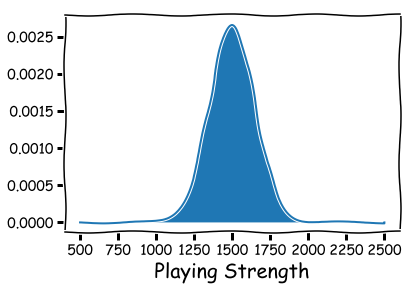

In [31]:
with plt.xkcd():
    # Plot between 500 and 2500 with .1 steps.
    x_axis = np.arange(500, 2500, 0.1)
    # Mean = 1500, SD = 200.
    plt.plot(x_axis, norm.pdf(x_axis,1500,150))
    plt.fill_between(x_axis, norm.pdf(x_axis,1500,150))
    plt.xlabel("Playing Strength",fontsize=20)

On a given day, the average player's stength will probably not be exactly 1500. Some days they'll do better, some days worse. The height of the rating in the above distribution roughly shows the chance that a player will perform at the given strength. It makes sense that a player with an Elo rating of 1500 is more likely to play with a strength of 1600 than 2000.

Mark Glickman gives a nice analogy for understanding the method in his excellent [overview of chess ratings methods](http://www.glicko.net/research/acjpaper.pdf):
> 
Suppose that every player brings a box containing many numbered slips of paper when sitting down to a chess game. Each number represents the player's "strength distribution." Instead of actually playing a chess game, each player reaches into the box and pulls out a single piece of paper at random, and the one containing the high number wins. In effect, this model for chess performance says that each player has the ability to play at a range of different strengths, but displays only one of these levels of ability during the game. Naturally, this procedure favors the person who carries a box that contains generally higher numbers, but of course this does not mean an automatic victory. This is analogous to chess where a better player usually wins, but not always.

Now, let's look at what it looks like when a weaker "player 1" (rating ~ 1350) plays a stronger "player 2" (rating ~ 1650):


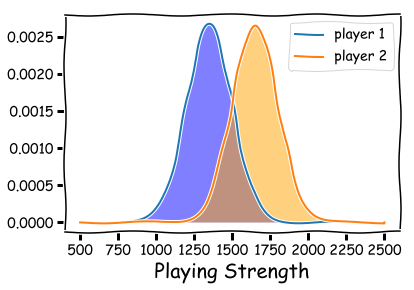

In [32]:
with plt.xkcd():
    x_axis = np.arange(500, 2500, 0.1)
    plt.plot(x_axis, norm.pdf(x_axis,1350,150),label="player 1")
    plt.fill_between(x_axis, norm.pdf(x_axis,1350,150), facecolor='blue', alpha=0.5)
    plt.plot(x_axis, norm.pdf(x_axis,1650,150),label="player 2")
    plt.fill_between(x_axis, norm.pdf(x_axis,1650,150), facecolor='orange', alpha=0.5)
    plt.legend(loc="best")
    plt.xlabel("Playing Strength",fontsize=20)

Obviously, in most matches between these two opponenets, player 2 (who has the higher mean rating) will win. However, we see that the two distributions still overlap quite a bit. What we really want to see is when the worse player 1's rating is higher than that of the better player 2' rating:

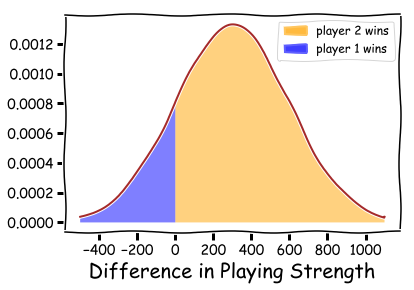

In [33]:
with plt.xkcd():
    x_axis = np.arange(-500, 1100, 0.1)
    plt.plot(x_axis, norm.pdf(x_axis,300,300), color='brown')
    # plt.fill_between(x_axis, norm.pdf(x_axis,300,300), facecolor='brown', alpha=0.5)
    plt.fill_between(x_axis, norm.pdf(x_axis,300,300), where=x_axis >0, facecolor='orange', alpha=0.5, label="player 2 wins")
    plt.fill_between(x_axis, norm.pdf(x_axis,300,300), where=x_axis <0, facecolor='blue', alpha=0.5, label= "player 1 wins")
    plt.legend(loc="upper right", fontsize=12)
    plt.xlabel("Difference in Playing Strength",fontsize=20)

As you can see in this graph, the better player 2 wins most of the time. However, when player 2's rating minus player 1's rating is less than zero, then the worse player 1 wins. 